#### Project Aim: To analyze the factors leading to Employee Attrition and build a model to predict if a staff will resign 

In [150]:
#importing the necessary libray

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option("display.min_rows", 100)
pd.set_option("display.max_columns", None)
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import classification_report

url = r"C:\Users\Jesus Is Lord\Employee Atrition.csv"
emp = pd.read_csv(url)
emp.head()

,Age,Resigned,BusinessTravel,DailyRate($),Department,DistanceFromHome(km),EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome($),MonthlyRate($),NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,Other,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Life Sciences,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Medical,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [99]:
#checking the shape
emp.shape

(1470, 33)

In [100]:
#checking the columns
emp.columns

Index(['Age', 'Resigned', 'BusinessTravel', 'DailyRate($)', 'Department',
       'DistanceFromHome(km)', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome($)', 'MonthlyRate($)', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

Printing all information about the data

In [101]:
emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Resigned                  1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate($)              1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome(km)      1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EmployeeNumber            1470 non-null   int64 
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

From the above output, we can see that we have no column with missing values. However, we still have to review the unique data points of each column.

In [102]:
print("age: \n \n {}".format(emp.Age.unique()))

print("\n Resigned: \n {}".format(emp.Resigned.unique()))

print("\n BusinessTravel: \n {}".format(emp.BusinessTravel.unique()))

print("\n DailyRate($): \n {}".format(emp["DailyRate($)"].unique()))

print("\n Department: \n {}".format(emp.Department.unique()))

print("\n DistanceFromHome(km): \n {}".format(emp["DistanceFromHome(km)"].unique()))

print("\n EducationField: \n {}".format(emp.EducationField.unique()))

print("\n EmployeeNumber: \n {}".format(emp.EmployeeNumber.unique()))

print("\n EnvironmentSatisfaction: \n {}".format(emp.EnvironmentSatisfaction.unique()))

print("\n Gender : \n {}".format(emp.Gender.unique()))

print("\n HourlyRate: \n {}".format(emp.HourlyRate.unique()))

print("\n JobInvolvement: \n {}".format(emp.JobInvolvement.unique()))

print("\n JobLevel: \n {}".format(emp.JobLevel.unique()))

print("\n JobRole: \n {}".format(emp.JobRole.unique()))

print("\n JobSatisfaction: \n {}".format(emp.JobSatisfaction.unique()))

print("\n MaritalStatus: \n {}".format(emp.MaritalStatus.unique()))

print("\n MonthlyIncome($)  \n {}".format(emp["MonthlyIncome($)"].unique()))

print("\n MonthlyRate($): \n {}".format(emp["MonthlyRate($)"].unique()))

print("\n NumCompaniesWorked: \n {}".format(emp.NumCompaniesWorked.unique()))

print("\n Over18: \n {}".format(emp.Over18.unique()))

print("\n OverTime: \n {}".format(emp.OverTime.unique()))

print("\n PercentSalaryHike: \n {}".format(emp.PercentSalaryHike.unique()))

print("\n PerformanceRating: \n{}".format(emp.PerformanceRating.unique()))

print("\n RelationshipSatisfaction: \n {}".format(emp.RelationshipSatisfaction.unique()))

print("\n StandardHours: \n {}".format(emp.StandardHours.unique()))

print("\n StockOptionLevel: \n {}".format(emp.StockOptionLevel.unique()))

print("\n TotalWorkingYears: \n {}".format(emp.TotalWorkingYears.unique()))

print("\n TrainingTimesLastYear: \n {}".format(emp.TrainingTimesLastYear.unique()))

print("\n WorkLifeBalance: \n {}".format(emp.WorkLifeBalance.unique()))

print("\n YearsAtCompany: \n {}".format(emp.YearsAtCompany.unique()))

print("\n YearsInCurrentRole: \n {}".format(emp.YearsInCurrentRole.unique()))

print("\n YearsSinceLastPromotion: \n {}".format(emp.YearsSinceLastPromotion.unique()))

print("\n YearsWithCurrManager: \n {}".format(emp.YearsWithCurrManager.unique()))

age: 
 
 [41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]

 Resigned: 
 ['Yes' 'No']

 BusinessTravel: 
 ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']

 DailyRate($): 
 [1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750  441  684  249  841  147  528
  594  470  957  542  802 1355 1150 1329  959 1033 1316  364  438  689
  201 1427  857  933 1181 1395  6

From the output of the unique values of each of the variables, we can now safely conclude that the data is free from wrong data input and is clean

#### Exploratory Data Analysis (EDA)

Next, we carried out exploratory data analysis and also visualization of some of the variables. EDA gives us a complete overview of the data

In [103]:
from pandas_profiling import ProfileReport

EDA_report = ProfileReport(emp)
EDA_report

#### Data Visualisations

The goal here is to carry out further visualizations in order to gain more insight into the data.

Visualizing the target (Resigned)

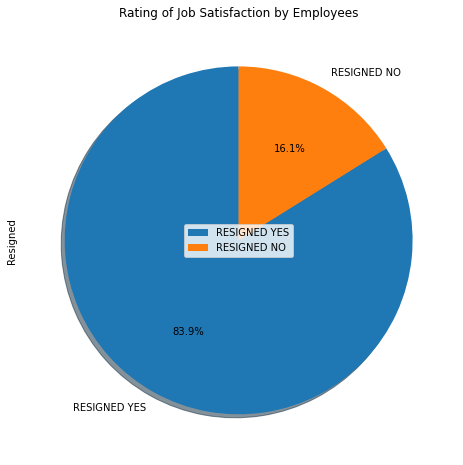

In [345]:
labels = "RESIGNED YES", "RESIGNED NO"
emp['Resigned'].astype(str).value_counts().plot(kind='pie',
                            figsize=(18, 8),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=labels) # add to subplot 2
plt.title ('Rating of Job Satisfaction by Employees')
plt.legend(labels=labels,loc='center')
plt.show()


From the output above, we can clearly see that the data is imbalanced. We will need to balance the data as we progress.

In [371]:
#Isolating only the resigned staff and storing in a variable called "resigned"
resigned = emp[emp["Resigned"] =="Yes"]
resigned = resigned.reset_index()
resigned.head()

,index,Age,Resigned,BusinessTravel,DailyRate($),Department,DistanceFromHome(km),EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome($),MonthlyRate($),NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41,Yes,Travel_Rarely,1102,Sales,1,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,2,37,Yes,Travel_Rarely,1373,Research & Development,2,Other,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
2,14,28,Yes,Travel_Rarely,103,Research & Development,24,Life Sciences,19,3,Male,50,2,1,Laboratory Technician,3,Single,2028,12947,5,Y,Yes,14,3,2,80,0,6,4,3,4,2,0,3
3,21,36,Yes,Travel_Rarely,1218,Sales,9,Life Sciences,27,3,Male,82,2,1,Sales Representative,1,Single,3407,6986,7,Y,No,23,4,2,80,0,10,4,3,5,3,0,3
4,24,34,Yes,Travel_Rarely,699,Research & Development,6,Medical,31,2,Male,83,3,1,Research Scientist,1,Single,2960,17102,2,Y,No,11,3,3,80,0,8,2,3,4,2,1,3


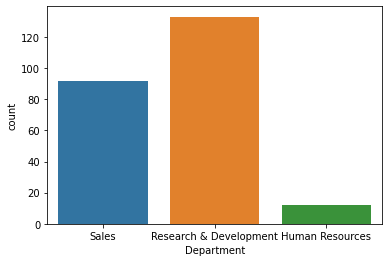

In [357]:
# visualizing count of resigned staff per department
v = sns.countplot(resigned['Department'])
plt.show()

From the output above, we have more resigned employees in Research & Development Department

<function matplotlib.pyplot.show(*, block=None)>

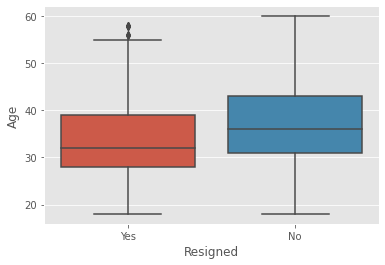

In [370]:
# Staff by Age and Resigned
plt.style.use('ggplot')
sns.boxplot(x = 'Resigned', y = 'Age', data = emp)
plt.show

From the output above, it appears that we have staff within the average age of 28 to 40 years old resigning in the organisation

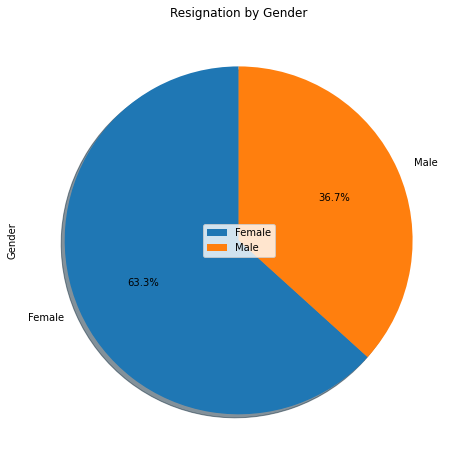

In [363]:
# Resigned by Gender
resigned['Gender'].astype(str).value_counts().plot(kind='pie',
                            figsize=(18, 8),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=resigned['Gender']) # add to subplot 2
plt.title ('Resignation by Gender')
plt.legend(labels=resigned['Gender'],loc='center')
plt.show()

Visualisation of all the rate attributes of both the resigned staff and current staff

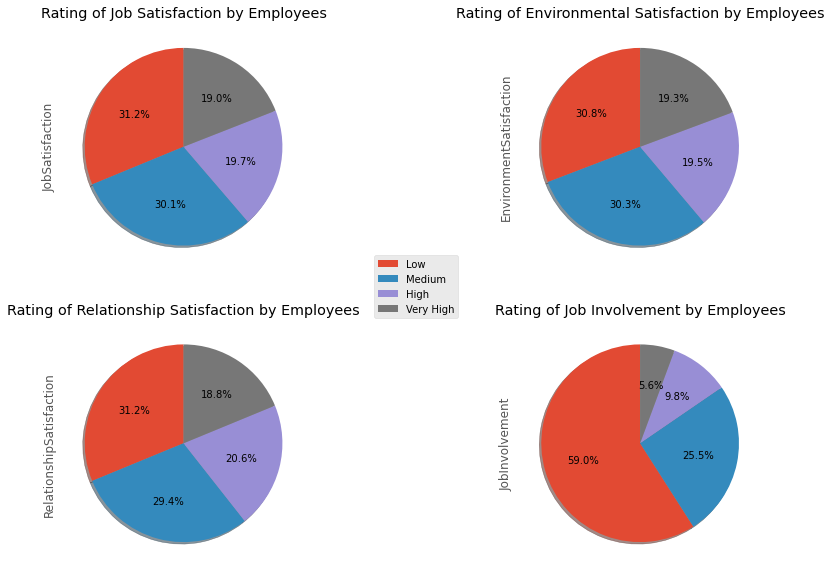

In [385]:
fig = plt.figure() 

ax1 = fig.add_subplot(221) 
ax2 = fig.add_subplot(222)  
ax3 = fig.add_subplot(223) 
ax4 = fig.add_subplot(224)  

labels = 'Low','Medium','High','Very High'

emp['JobSatisfaction'].astype(str).value_counts().plot(kind='pie',
                            figsize=(15, 10),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,ax=ax1) # add to subplot 2
ax1.set_title ('Rating of Job Satisfaction by Employees')
fig.legend(labels=labels,loc='center')

emp['EnvironmentSatisfaction'].astype(str).value_counts().plot(kind='pie',
                            figsize=(15, 10),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,ax=ax2) 
ax2.set_title('Rating of Environmental Satisfaction by Employees')

emp['RelationshipSatisfaction'].astype(str).value_counts().plot(kind='pie',
                            figsize=(15, 10),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,ax=ax3)
ax3.set_title('Rating of Relationship Satisfaction by Employees')

emp['JobInvolvement'].astype(str).value_counts().plot(kind='pie',
                            figsize=(15, 10),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,ax=ax4) 
ax4.set_title('Rating of Job Involvement by Employees')

plt.show()

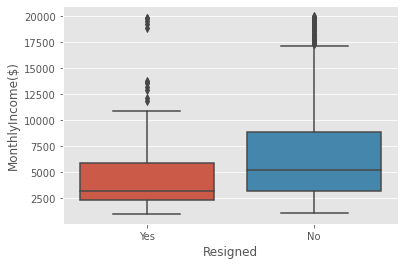

In [366]:
#boxplot of staff attrition by Monthlyincome 
plt.style.use('ggplot')
sns.boxplot(x = 'Resigned', y = 'MonthlyIncome($)', data = emp)
plt.show()

From the output above, we have staff resigning who earn lower than the mid salary of staff who have not resigned. Resigned staff earn an average income of $2500 to $5500 monthly

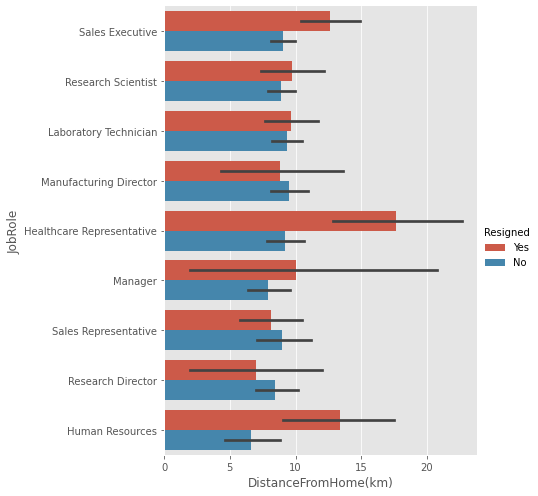

In [378]:
sns.catplot(x = 'DistanceFromHome(km)', y = 'JobRole', hue = 'Resigned', data = emp, kind = 'bar', height = 7)
plt.show()

The chart above shows the relationship between Distance from home, Job role and Attrition

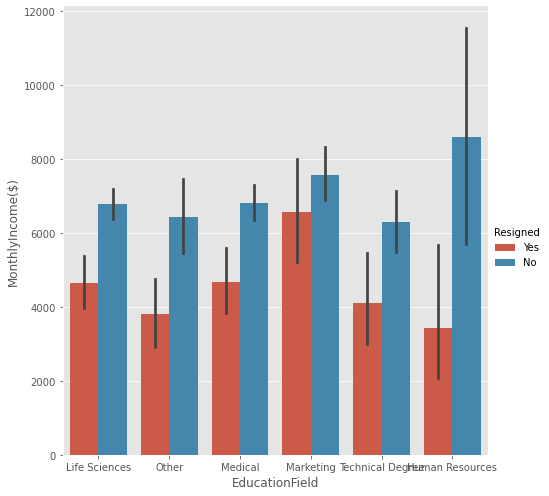

In [383]:
sns.catplot(x = 'EducationField', y = 'MonthlyIncome($)', hue = 'Resigned', data = emp, kind = 'bar', height = 7)
plt.show()

The above chart shows relationship between Education field, monthly income and attrition

In [391]:
emp.head()

,Age,Resigned,BusinessTravel,DailyRate($),Department,DistanceFromHome(km),EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome($),MonthlyRate($),NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,Other,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Life Sciences,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Medical,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


### More Visualizations: Count of resigned staff by the following variables: "MaritalStatus", "NumCompaniesWorked", "OverTime", "YearsSinceLastPromotion", "YearsAtCompany", "HourlyRate"

<Figure size 576x504 with 0 Axes>

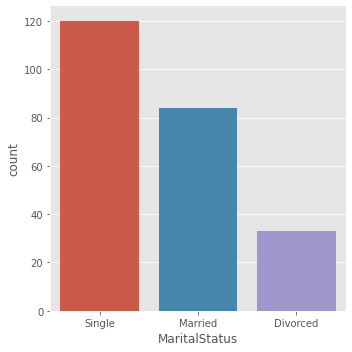

<Figure size 576x504 with 0 Axes>

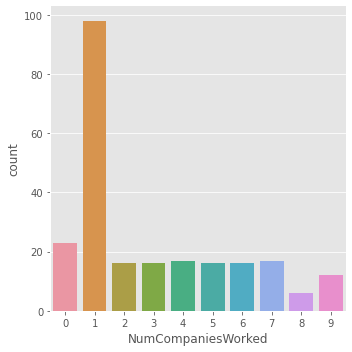

<Figure size 576x504 with 0 Axes>

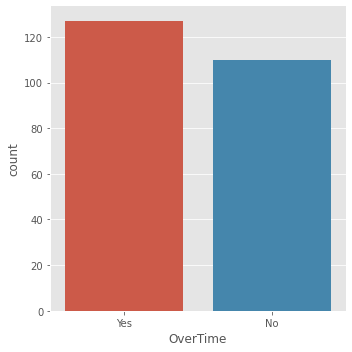

<Figure size 576x504 with 0 Axes>

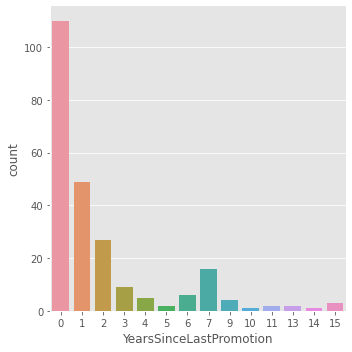

<Figure size 576x504 with 0 Axes>

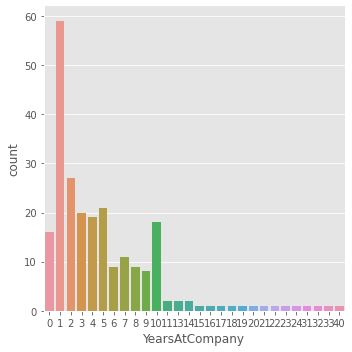

<Figure size 576x504 with 0 Axes>

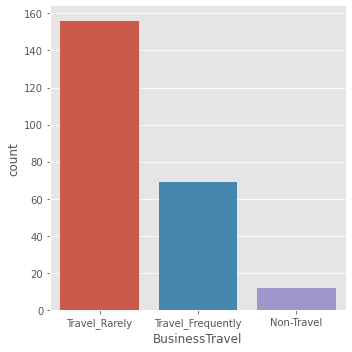

In [396]:
var = ["MaritalStatus", "NumCompaniesWorked", "OverTime", "YearsSinceLastPromotion", "YearsAtCompany", "BusinessTravel"]

for i in var:
    plt.figure(figsize = (8, 7))
    sns.catplot(data = resigned, x = i, kind = "count")
    plt.show()

### Pre Modelling

To carry out our modelling, we start by first preprocessing our data. The following below are steps we will be carrying out in this session.

1. Drop the "Over18" variable. It appears all the staff are over 18, therefore the variable is not important in our machine model building
2. Convert all categorial variables to to numerical.
3. Split the data into training and testing sets
3. Treat the data imbalance issue

In [109]:
#droping the "Over18" variable
emp.drop("Over18", axis = 1, inplace = True)

In [110]:
emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Resigned                  1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate($)              1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome(km)      1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EmployeeNumber            1470 non-null   int64 
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [116]:
#To convert all the categorical values to numerical we first determine all the cateorical values
emp.select_dtypes(include='object').head()

,Resigned,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No


In [117]:
#Applying label encoder to the selected categorical variables
label_encoder = LabelEncoder()
emp['Resigned'] = label_encoder.fit_transform(emp['Resigned'])
emp['BusinessTravel'] = label_encoder.fit_transform(emp['BusinessTravel'])
emp['Department'] = label_encoder.fit_transform(emp['Department'])
emp['EducationField'] = label_encoder.fit_transform(emp['EducationField'])
emp['Gender'] = label_encoder.fit_transform(emp['Gender'])
emp['JobRole'] = label_encoder.fit_transform(emp['JobRole'])
emp['MaritalStatus'] = label_encoder.fit_transform(emp['MaritalStatus'])
emp['OverTime'] = label_encoder.fit_transform(emp['OverTime'])

In [118]:
#printing the emp dataframe first five rows
emp.head()

,Age,Resigned,BusinessTravel,DailyRate($),Department,DistanceFromHome(km),EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome($),MonthlyRate($),NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,1,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,2,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,4,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,1,5,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,3,7,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,80,1,6,3,3,2,2,2,2


In [119]:
emp.shape

(1470, 32)

In [144]:
#checking the dtypes
emp.dtypes

Age                         int64
Resigned                    int32
BusinessTravel              int32
DailyRate($)                int64
Department                  int32
DistanceFromHome(km)        int64
EducationField              int32
EmployeeNumber              int64
EnvironmentSatisfaction     int64
Gender                      int32
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int32
JobSatisfaction             int64
MaritalStatus               int32
MonthlyIncome($)            int64
MonthlyRate($)              int64
NumCompaniesWorked          int64
OverTime                    int32
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrent

##### Next we isolate the target variable from the features

In [133]:
label = emp["Resigned"].values
features =  emp.drop("Resigned", axis = 1)

In [132]:
#checking the value count of the target variable datapoints 

emp["Resigned"].value_counts(normalize = True).mul(100).round(2).astype(str) + "%"

0    83.88%
1    16.12%
Name: Resigned, dtype: object

#### From the output above, we can see that the data is not balancesd. We therefore treat the imbalance issue by applying a method called oversampling.

In [134]:
#importing the necessary libraries
from collections import Counter
import imblearn
from imblearn.over_sampling import SMOTE

smote = SMOTE()

features_smote, label_smote = smote.fit_resample(features, label)
print("Original target shape: {}".format(Counter(label)))
print("Resampled target shape: {}".format(Counter(label_smote)))

Original target shape: Counter({0: 1233, 1: 237})
Resampled target shape: Counter({1: 1233, 0: 1233})


##### Spliting the dataset

We split the data into training and testing sets at a ratio of 80:20.   80% for training while 20% for testing. We will be spliting the dataset in two categories as well, which are "the balanced data" and "imbalanced data".

In [135]:
from sklearn.model_selection import train_test_split
#spliting the data into training set and test set for balanced data

x_train_bal, x_test_bal, y_train_bal, y_test_bal = train_test_split(features_smote, label_smote, test_size=0.2, random_state=0)


#spliting the data into training set and test set for imbalanced data
x_train_imb, x_test_imb, y_train_imb, y_test_imb = train_test_split(features, label, test_size=0.2, random_state=0)

##### Next we nomalize the x_test and x_train datasets by applying the a scaling method called MinMaxScaler

In [136]:
#normalizing the data (the balance set) using MinMaxScaler library
from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler()
x_train_bal = scaler.fit_transform(x_train_bal)
x_test_bal = scaler.transform(x_test_bal)
x_train_bal.shape, x_test_bal.shape, y_train_bal.shape, y_test_bal.shape

((1972, 31), (494, 31), (1972,), (494,))

In [137]:
#normalizing the data (the imbalance set) using MinMaxScaler library

x_train_imb = scaler.fit_transform(x_train_imb)
x_test_imb = scaler.transform(x_test_imb)
x_train_imb.shape, x_test_imb.shape, y_train_imb.shape, y_test_imb.shape

((1176, 31), (294, 31), (1176,), (294,))

## Model Building
We will be defining a functions to build our models and check our accuracy metrics. We will be building our model with the two different data sets.
* First: The balanced data
* Second: The imbalanced data

In [255]:
def modelling (model_name, x_train, x_test, y_train, y_test):
    #create an instance of the model
    
    model = model_name
    
    #fitting the model
    model.fit(x_train, y_train)
    
    #get the training and testing accuracy
    
    Training_Accuracy = model.score(x_train, y_train) * 100
    Test_Accuracy = model.score(x_test, y_test)* 100
    
    #checking y pred
    y_pred = model.predict(x_test)
    
    #Accuracy metrics check
    precision = precision_score(y_test, y_pred) * 100
    recall = recall_score(y_test, y_pred) * 100
    f_score = f1_score(y_test, y_pred) * 100
    
    data = {'Model': ["model"],
        "Train_acc": [Training_Accuracy],
        "Test_acc": [Test_Accuracy],
        "Precision": [precision],
        "Recall": [recall],
        "F-score": [f_score]}http://localhost:8888/notebooks/Employee%20Atrition.ipynb#Model-Building-with-balanced-data
    model_metrics = pd.DataFrame(data = data)

    
    return y_pred, model_metrics, model

## Model Building with balanced data

#### 1. Random Forest

In [256]:
#calling on the modelling function
from sklearn.ensemble import RandomForestClassifier

y_pred_forest, model_metrics_forest, rf = modelling (RandomForestClassifier(random_state=0, n_estimators=200,criterion='entropy', n_jobs=-1, max_depth = 70, min_samples_leaf=12), x_train_bal, x_test_bal, y_train_bal, y_test_bal)

In [259]:
#printing the model instantiated variable
rf

RandomForestClassifier(criterion='entropy', max_depth=70, min_samples_leaf=12,
                       n_estimators=200, n_jobs=-1, random_state=0)

In [208]:
#printing the model metrics
model_metrics_forest

,Model,Train_acc,Test_acc,Precision,Recall,F-score
0,model,91.93712,84.615385,87.250996,83.269962,85.214008


Comment

We carried out some hyperparemeter tuning on the model, to reduce overfitting. We can equally see that we had excellent results in all the evaluation metrics.

In [186]:
#printing the y prediction of random forest
y_pred_forest[:10], y_test_bal[:10]

(array([0, 0, 1, 0, 0, 1, 1, 0, 1, 1]), array([0, 0, 1, 0, 0, 1, 1, 0, 1, 1]))

#### Confusion Matrix Random Forest Model

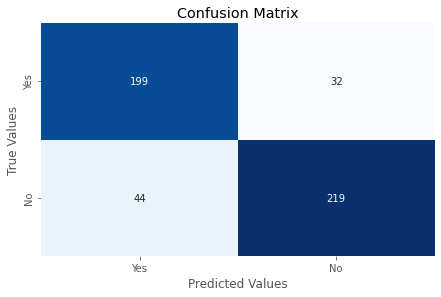

In [386]:
# create confusion matrix
matrix8 = confusion_matrix(y_test_bal, y_pred_forest)

dataframe8 = pd.DataFrame(matrix8, index=['Yes', 'No'], 
                         columns=['Yes', 'No'])

# create heatmap
sns.heatmap(dataframe8, annot=True, fmt="d", cbar=None, cmap='Blues')
plt.title('Confusion Matrix')
plt.tight_layout(), plt.xlabel('Predicted Values'), plt.ylabel('True Values')
plt.show()

#### 2. Gradient Boosting

In [261]:
#calling on the modelling function
from sklearn.ensemble import GradientBoostingClassifier

y_pred_grad, model_metrics_grad, gbc = modelling (GradientBoostingClassifier(n_estimators=100,random_state=100,max_features=6), x_train_bal, x_test_bal, y_train_bal, y_test_bal)

In [262]:
#printing the model instantiated variable
gbc

GradientBoostingClassifier(max_features=6, random_state=100)

In [242]:
#printing the model_metrics
model_metrics_grad

,Model,Train_acc,Test_acc,Precision,Recall,F-score
0,model,93.306288,87.651822,88.549618,88.212928,88.380952


#### Confusion Matrix Gradient Boosting Model

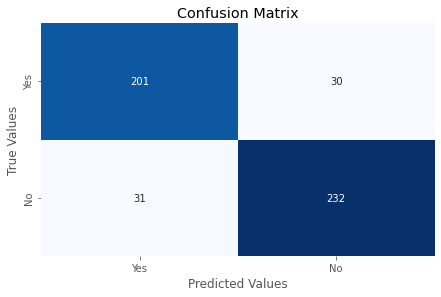

In [389]:
# create confusion matrix
matrix88 = confusion_matrix(y_test_bal, y_pred_grad)

dataframe88 = pd.DataFrame(matrix88, index=['Yes', 'No'], 
                         columns=['Yes', 'No'])

# create heatmap
sns.heatmap(dataframe88, annot=True, fmt="d", cbar=None, cmap='Blues')
plt.title('Confusion Matrix')
plt.tight_layout(), plt.xlabel('Predicted Values'), plt.ylabel('True Values')
plt.show()

Comment

We also carried out some hyperparameter tuning on the gradient boosting model. This was done to reduce over fitting. We can equally see that we had excellent results in all the evaluation metrics.

In [243]:
#printing the y prediction of the model
y_pred_grad[:10], y_test_bal[:10]

(array([0, 0, 1, 0, 0, 1, 1, 0, 1, 1]), array([0, 0, 1, 0, 0, 1, 1, 0, 1, 1]))

## Model Building with imbalanced data

#### 1. Random Forest

In [264]:
#calling on the modelling function
from sklearn.ensemble import RandomForestClassifier

y_pred_forest2, model_metrics_forest2, rf2 = modelling (RandomForestClassifier(), x_train_imb, x_test_imb, y_train_imb, y_test_imb)

In [265]:
#printing the model instantiated variable
rf2

RandomForestClassifier()

In [251]:
#printing the model_metrics
model_metrics_forest2

,Model,Train_acc,Test_acc,Precision,Recall,F-score
0,model,100.0,85.37415,80.0,16.326531,27.118644


Comment

From the output above, we can see that the model built with imbalanced data has extremely poor recall and f-score values. This emphasises the need to always carry out proper data preprocessing before model building. 

In [250]:
#printing the y prediction
y_pred_forest2[:10], y_test_imb[:10]

(array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0]), array([0, 0, 1, 0, 1, 0, 1, 0, 0, 1]))

#### 2. Gradient Boosting

In [266]:
from sklearn.ensemble import GradientBoostingClassifier

y_pred_grad2, model_metrics_grad2, gbc2 = modelling (GradientBoostingClassifier(), x_train_imb, x_test_imb, y_train_imb, y_test_imb)

In [267]:
#printing the model instantiated variable
gbc2

GradientBoostingClassifier()

In [253]:
#printing the model_metrics
model_metrics_grad2

,Model,Train_acc,Test_acc,Precision,Recall,F-score
0,model,96.003401,86.734694,72.727273,32.653061,45.070423


From the output above, we can also see that the model built  with gradient boosting classifer on imbalanced data also performs poorly. It has poor precision, recall and f-score values. This also emphasized the need to carry out proper data preprocessing before model building. 

In [254]:
#printing the y prediction
y_pred_grad2[:10], y_test_imb[:10]

(array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0]), array([0, 0, 1, 0, 1, 0, 1, 0, 0, 1]))

## ROC Curve of our models built with balanced data

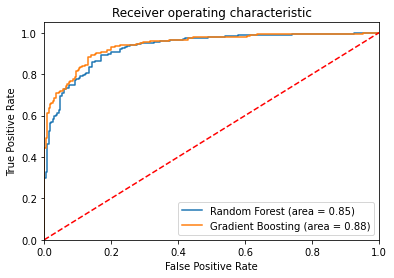

In [330]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

#ROC for random forest
rf_roc_auc = roc_auc_score(y_test_bal, rf.predict(x_test_bal))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test_bal, rf.predict_proba(x_test_bal)[:,1])

#ROC for Gradient boosting
gbc_roc_auc = roc_auc_score(y_test_bal, gbc.predict(x_test_bal))
gbc_fpr, gbc_tpr, gbc_thresholds = roc_curve(y_test_bal, gbc.predict_proba(x_test_bal)[:,1])

#ROC Curve for Random Forest & Gradient Boosting
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot(gbc_fpr, gbc_tpr, label='Gradient Boosting (area = %0.2f)' % gbc_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()

## ROC_AUC Score for our best models

In [337]:
#finding the probability of the prediction for random forest and gradient boosting with balanced data
proba_rf = rf.predict_proba(x_test_bal)
proba_gbc = gbc.predict_proba(x_test_bal)

In [338]:
#importing the roc_auc score library
from sklearn.metrics import roc_auc_score

# auc scores
auc_score_rf = (roc_auc_score(y_test_bal, proba_rf[:,1]) * 100).round(2).astype(str) + "%"
auc_score_gbc = (roc_auc_score(y_test_bal, proba_gbc[:,1]) * 100).round(2).astype(str) + "%"

print(auc_score_rf, auc_score_gbc)

92.97% 94.19%


Comment

The AUC score of random forest model on the test set is 92.97% while that of grandient boosting is 94.19%. Based on AUC score analysis on the prediction probabilities, we can conclude that the gradient boosting model performs slightly better at distinguishing between the positive and negative classes when the features were used for prediction, as it has a higher AUC score.

## Feature importance for random forest model

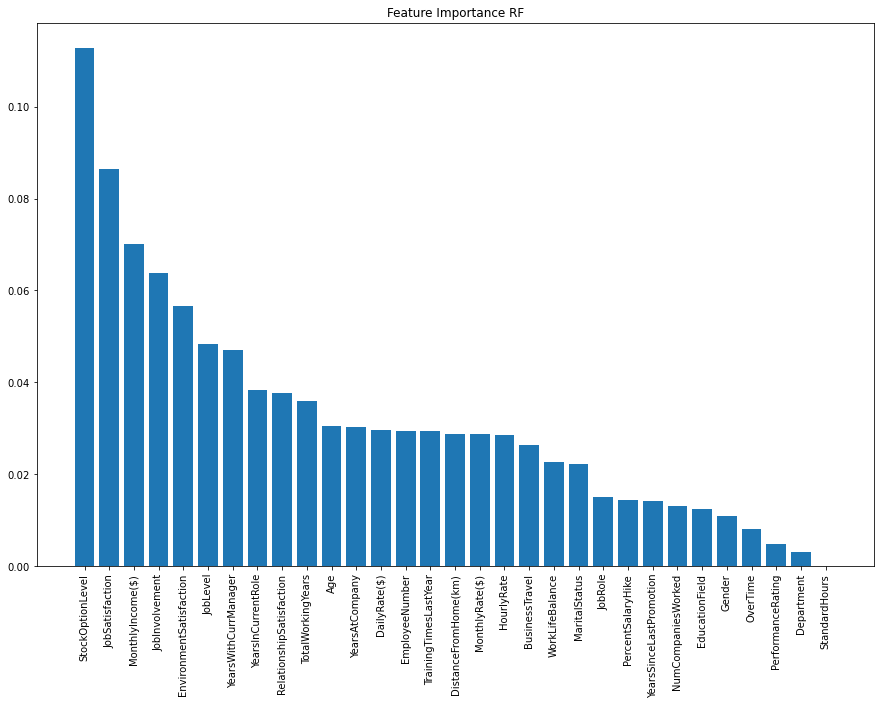

In [314]:
# calculating the features importance of each feature in the model
importances = rf.feature_importances_

# sort in descending order
indices = np.argsort(importances)[::-1]

# Arrange feature names to match the sorted feature importances
names = [features.columns[i] for i in indices]
plt.figure(figsize = (15, 10))
plt.title("Feature Importance RF")
plt.bar(range(features.shape[1]), importances[indices])
plt.xticks(range(features.shape[1]), names, rotation=90) 
plt.show()

In [328]:
from sklearn.feature_selection import SelectFromModel
# Create random forest classifier
randomforest = RandomForestClassifier(random_state=0, n_jobs=-1, max_depth = 4)

# Create object that selects features with importance greater than or equal to the threshold - 0.035
selector = SelectFromModel(randomforest, threshold=0.035)
    
# Feature new feature matrix using selector
features_important = selector.fit_transform(x_train_bal, y_train_bal) # Train random forest using most important featres

rf_model = randomforest.fit(features_important, y_train_bal)

In [329]:
# transform validation set to select the important features
test_features = selector.transform(x_test_bal)

print("Random forest training accuracy with features selected: {:.4f}".format(rf_model.score(features_important, 
                                                                                             y_train_bal)))
print("Random forest validation accuracy with features selected: {:.4f}".format(rf_model.score(test_features, 
                                                                                               y_test_bal)))

Random forest training accuracy with features selected: 0.8256
Random forest validation accuracy with features selected: 0.7692


We set the features importance threshold to be 0.035

## Feature importance for gradient boosting model

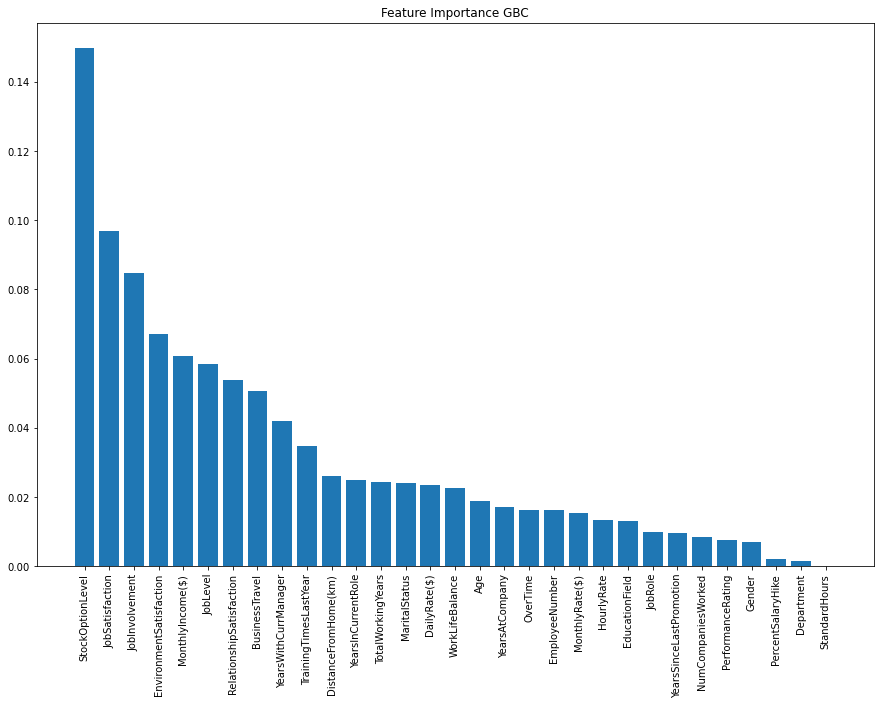

In [313]:
# calculating the features importance of each feature in the model
importances = gbc.feature_importances_

# sort in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [features.columns[i] for i in indices]

plt.figure(figsize = (15, 10))
plt.title("Feature Importance GBC") 
plt.bar(range(features.shape[1]), importances[indices]) 
plt.xticks(range(features.shape[1]), names, rotation=90) 
plt.show()

In [326]:
from sklearn.feature_selection import SelectFromModel
# Create gradientboosting classifier
gradientbc = GradientBoostingClassifier(n_estimators=100,random_state=100,max_features=6)

# Create object that selects features with importance greater # than or equal to a threshold
selector = SelectFromModel(gradientbc, threshold=0.035)
    
# Feature new feature matrix using selector
features_important2 = selector.fit_transform(x_train_bal, y_train_bal) # Train gradient bc using most important featres

gbc_model = gradientbc.fit(features_important2, y_train_bal)  

In [327]:
# transform the validation set to select the important features
test_features2 = selector.transform(x_test_bal)

print("Gradient boosting training accuracy with features selected: {:.4f}".format(gbc_model.score(features_important2, 
                                                                                             y_train_bal)))
print("Gradient boosting validation accuracy with features selected: {:.4f}".format(gbc_model.score(test_features2, 
                                                                                               y_test_bal)))

Gradient boosting training accuracy with features selected: 0.8960
Gradient boosting validation accuracy with features selected: 0.8340


#### AUC Score on the test set

In [335]:
#finding the probability of the prediction for random forest and gradient boosting with balanced data on the test set
proba_rf_feat = rf_model.predict_proba(test_features)
proba_gbc_feat = gbc_model.predict_proba(test_features2)

In [336]:
#importing the roc_auc score library
from sklearn.metrics import roc_auc_score

# auc scores
auc_score_rf_feat = (roc_auc_score(y_test_bal, proba_rf_feat[:,1]) * 100).round(2).astype(str) + "%"
auc_score_gbc_feat = (roc_auc_score(y_test_bal, proba_gbc_feat[:,1]) * 100).round(2).astype(str) + "%"

print(auc_score_rf_feat, auc_score_gbc_feat)

85.8% 92.03%


From the output above, we can say that the gradient boosting model performed better than random forest, when we carried out features selection using the same threshold value of 0.35 for the features selection for both models

#### Conclusion

Through this project, we created a machine learning model that is able to predict an employee resigning from an organisation. The best model was gradient boosting classifier model, it perform better both when we used selected features to build our model and when we used all the features of the employees to build our model.

Based on our features selection exercise using gradient boosting at a threshold of 0.35 and above, we were able to come up with top 10 features for which employee attrition highly depends on. They are:

* StockOptionLevel
* JobSatisfaction
* JobInvolvement
* EnvironmentSatisfaction
* MonthlyIncome($)
* JobLevel
* RelationshipSatisfaction
* BusinessTravel
* YearsWithCurrManager
* TrainingTimesLastYear'

The company should therefore critically look into these 10 factors and find out ways to improve on them inorder to cub the issue of losing more staff. It was equally observed that the StockOptionLevel factor was very high compare to others.

## Thank You